# Level 3: Task 2

# Task: Customer Preference Analysis
Analyze the relationship between the type of cuisine and the restaurant's rating.

Identify the most popular cuisines among customers based on the number of votes.

Determine if there are any specific cuisines that tend to receive higher ratings.

In [4]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df = pd.read_csv('/content/Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [23]:
# Analyze the relationship between the type of cuisine and the restaurant's rating.
average_restaurant_rating_by_cuisine = df.groupby('Cuisines')['Votes'].mean()

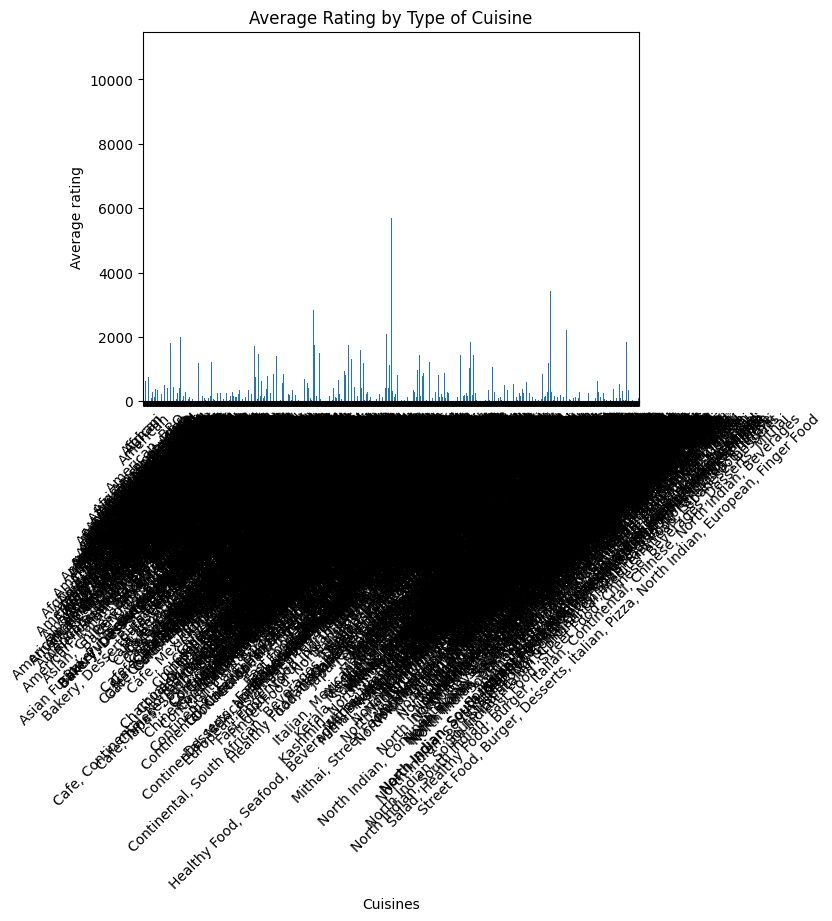

In [33]:
# Plot the average rating by cuisine
average_restaurant_rating_by_cuisine.plot(kind='bar')
plt.xlabel('Cuisines')
plt.ylabel('Average rating')
plt.title('Average Rating by Type of Cuisine')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Identifying the most popular cuisines among customers based on the number of votes.
most_popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
most_popular_cuisines

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64

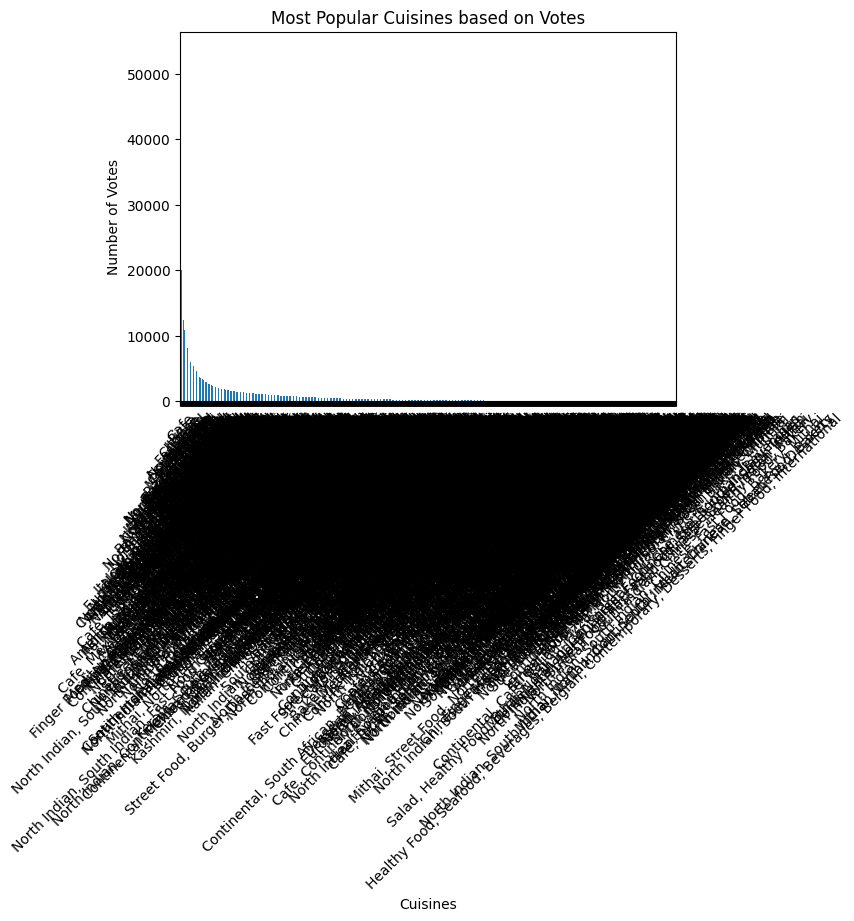

In [31]:
# Plot the number of votes by cuisine
most_popular_cuisines.plot(kind='bar')
plt.xlabel('Cuisines')
plt.ylabel('Number of Votes')
plt.title('Most Popular Cuisines based on Votes')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Determining if there are any specific cuisines that tend to receive higher ratings.
correlation_cuisine_rating_votes = df.groupby('Cuisines')['Rating text', 'Votes'].corr().iloc[0::2, -1]
# #It seems to be extracting the correlation coefficient between 'Rating text' and 'Votes' from the correlation matrix.

<ipython-input-34-5d449a2bd682>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_cuisine_rating_votes = df.groupby('Cuisines')['Rating text', 'Votes'].corr().iloc[0::2, -1]
<ipython-input-34-5d449a2bd682>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation_cuisine_rating_votes = df.groupby('Cuisines')['Rating text', 'Votes'].corr().iloc[0::2, -1]


In [35]:
# Filter cuisines with a positive correlation
higher_rated_cuisines = correlation_cuisine_rating_votes[correlation_cuisine_rating_votes > 0].index

print("Cuisines that tend to receive higher ratings: {', '.join(higher_rated_cuisines)}")

Cuisines that tend to receive higher ratings: {', '.join(higher_rated_cuisines)}
